In [1]:
# Decision Tree Model
# Import libraries
import numpy as np # For linear algebra
import pandas as pd # For data preparation and processing or data manipulation
import seaborn as sns # For statistical data visualization
import matplotlib.pyplot as plt # For plotting data visualization


import graphviz # For visualization of the leave nodes

# Machine Learning Libraries For Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Control of the Display -> Optional
pd.options.display.max_columns=50
sns.set(style='darkgrid', rc={'axes.facecolor': '#616E7C'})

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load/ Read the data-set
disease = pd.read_csv('heart_disease.csv')
disease.head(20) # Shows the first nth value

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
"""__summary
cp = chest pain
trestbp= resting blood pressure
chol = cholesterol
fbs=fasting blood sugar
restecg=resting elctrocardiography
exang = exercise induced again
oldpeak= ST depression induced
slope = the slope of peak exercise
ca = number of major vessel
thal = normal, texted defect, reversible defect
target = have disease or not (1=yes, 0=no)
"""

'__summary\ncp = chest pain\ntrestbp= resting blood pressure\nchol = cholesterol\nfbs=fasting blood sugar\nrestecg=resting elctrocardiography\nexang = exercise induced again\noldpeak= ST depression induced\nslope = the slope of peak exercise\nca = number of major vessel\nthal = normal, texted defect, reversible defect\ntarget = have disease or not (1=yes, 0=no)\n'

In [4]:
# Target Value counts
# Number of people with heart disease
# Column for target
disease.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [5]:
# Show percentage of male and female of those with heart disease
count_female = len(disease[disease.sex == 0])
count_male = len(disease[disease.sex == 1])

#Show the output
print('Percentage of female Patients: {:.2f}%'.format(count_female/len(disease.sex)*100))
print('Percentage of male Patients: {:.2f}%'.format(count_male/len(disease.sex)*100))

Percentage of female Patients: 30.44%
Percentage of male Patients: 69.56%


In [6]:
# Show the mean 
disease.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [7]:
# Show null oe NaN values
disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# ML for Training and Testing the dataset
# Create Logistic Regression
y = disease.target.values # For making the other variables dependent
x_data = disease.drop(['target'], axis=1) # Make 'target' variable only independent variable

In [9]:
# Split the data for training=79 and testing=21
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.21, random_state=41)

In [10]:
# Check shape of the data remaining after splitting into training and testing
X_train.shape, X_test.shape

((809, 13), (216, 13))

In [11]:
# Check the datatype
X_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [12]:
# X_train headers
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
801,63,1,3,145,233,1,0,150,0,2.3,0,0,1
860,52,1,0,112,230,0,1,160,0,0.0,2,1,2
499,46,0,2,142,177,0,0,160,1,1.4,0,0,2
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [13]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [14]:
# Predict the class label for the test data using decision tree classifier
y_predict_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model Accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_predict_gini)))

Model Accuracy score with criterion gini index: 0.8426


In [15]:
# Predict the class label for training data using decision tree classifier
y_pred_gini =clf_gini.predict(X_train) # We want to look at the arrays
y_pred_gini

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [16]:
# Actual Work
# Print the training set of accuracy score
print('Training-set Accuracy score: {0:0.4f}'.format(clf_gini.score(X_train, y_train))) # 1st accuracy of the model
print('Testing-set Accuracy score: {0:0.4f}'.format(clf_gini.score(X_test, y_test)))

Training-set Accuracy score: 0.8480
Testing-set Accuracy score: 0.8426


# Visualization of the decision = 2ways
#1st way->Visualize decision tree leave node 

[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.5\nsamples = 809\nvalue = [407, 402]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.363\nsamples = 398\nvalue = [303, 95]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.5\nsamples = 170\nvalue = [87, 83]'),
 Text(0.0625, 0.125, 'gini = 0.383\nsamples = 97\nvalue = [25, 72]'),
 Text(0.1875, 0.125, 'gini = 0.256\nsamples = 73\nvalue = [62, 11]'),
 Text(0.375, 0.375, 'x[9] <= 0.45\ngini = 0.1\nsamples = 228\nvalue = [216, 12]'),
 Text(0.3125, 0.125, 'gini = 0.306\nsamples = 53\nvalue = [43, 10]'),
 Text(0.4375, 0.125, 'gini = 0.023\nsamples = 175\nvalue = [173, 2]'),
 Text(0.75, 0.625, 'x[0] <= 56.5\ngini = 0.378\nsamples = 411\nvalue = [104, 307]'),
 Text(0.625, 0.375, 'x[9] <= 3.55\ngini = 0.22\nsamples = 246\nvalue = [31, 215]'),
 Text(0.5625, 0.125, 'gini = 0.192\nsamples = 241\nvalue = [26, 215]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.875, 0.375, 'x[1] <= 0.5\ngini = 0.493\nsamples = 165\nvalue = [73, 92]'),


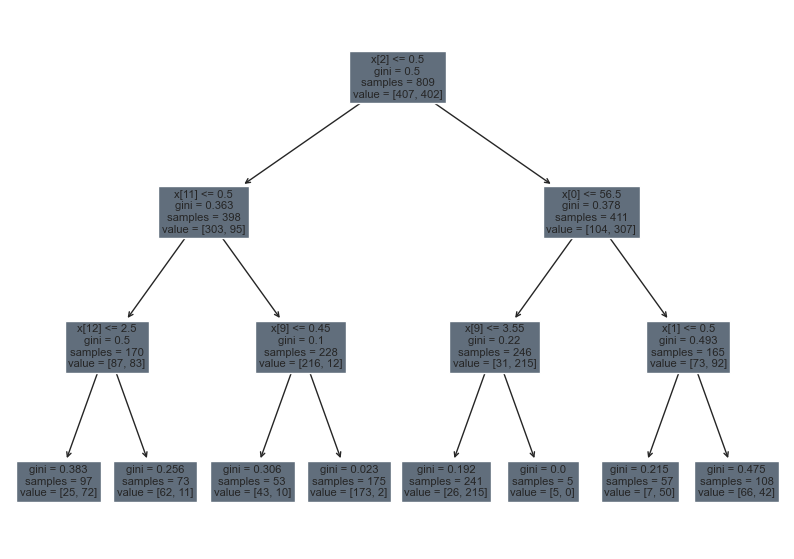

In [17]:

plt.figure(figsize=(10,7)) # -> Create figure for width and height
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

# 2nd way



In [18]:
import graphviz
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('heart_disease.csv')
y = df['target'].values
x_data = df.drop(['target'], axis=1)

# Train the decision tree classifier
model = tree.DecisionTreeClassifier()
model.fit(x_data, y)

#Get the class-name from the dataset
class_name = df['target'].unique().astype(str)

# Generate the graphviz visualization
tree.export_graphviz(model, out_file='geriga_sunday.dot', feature_names=x_data.columns, class_names=class_name, label='all',
                     filled=True, rounded=True)